## Lab 4 - Plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = sm.datasets
import seaborn as sns

## Download, clean, and merge data

In [2]:
# Download reported crime data from 2019

def get_data_chicago(id):
    '''
    Connect to the chicago data portal API and returns a dataframe
    '''
    
    url = f'https://data.cityofchicago.org/api/views/{id}/rows.csv?accessType=DOWNLOAD'
    df = pd.read_csv(url)

    
    return df

In [3]:
crimes2019 = get_data_chicago('w98m-zvie')
crimes2020 = get_data_chicago('qzdf-xmn8')

crimes = pd.concat([crimes2019, crimes2020])

crimes = crimes[['ID', 'Date', 'Primary Type', 'FBI Code', 
        'Arrest', 'Community Area', 'Year','Location']]

crimes.head()

,ID,Date,Primary Type,FBI Code,Arrest,Community Area,Year,Location
0,11890191,08/15/2019 11:04:36 AM,NARCOTICS,18,False,29,2019,NaN
1,11908877,10/23/2019 11:30:00 AM,NARCOTICS,18,False,76,2019,NaN
2,11889365,09/11/2019 10:47:03 AM,NARCOTICS,18,False,67,2019,NaN
3,11911065,11/23/2019 09:15:00 AM,NARCOTICS,18,False,23,2019,NaN
4,11947578,12/04/2019 12:00:00 PM,NARCOTICS,18,False,29,2019,NaN


In [4]:
#Chicago community areas dataset
comm_areas = get_data_chicago('igwz-8jzy')

#select only relevant columns
comm_areas = comm_areas[['COMMUNITY', 'AREA_NUMBE']]

print(comm_areas.shape)
comm_areas.head()

(77, 2)


,COMMUNITY,AREA_NUMBE
0,DOUGLAS,35
1,OAKLAND,36
2,FULLER PARK,37
3,GRAND BOULEVARD,38
4,KENWOOD,39


In [5]:
#merge crime df and community areas df
merged = crimes.merge(comm_areas, left_on="Community Area", 
                      right_on="AREA_NUMBE", how="inner")
print(merged.shape)
merged.head()

(428912, 10)


,ID,Date,Primary Type,FBI Code,Arrest,Community Area,Year,Location,COMMUNITY,AREA_NUMBE
0,11890191,08/15/2019 11:04:36 AM,NARCOTICS,18,False,29,2019,NaN,NORTH LAWNDALE,29
1,11947578,12/04/2019 12:00:00 PM,NARCOTICS,18,False,29,2019,NaN,NORTH LAWNDALE,29
2,11908866,11/25/2019 11:15:00 AM,NARCOTICS,18,True,29,2019,NaN,NORTH LAWNDALE,29
3,11903896,05/01/2019 12:01:00 AM,CRIMINAL SEXUAL ASSAULT,02,False,29,2019,NaN,NORTH LAWNDALE,29
4,11899253,11/19/2019 06:00:00 AM,NARCOTICS,18,True,29,2019,NaN,NORTH LAWNDALE,29


## Plotting in matplotlib

**fig, ax = plt.subplots()**
* fig - to change figure-level attributes or save the figure as an image file later
* ax or axes - specifying subplots - typically you can use ax.plot or axes[1].plot to make plots on each axis

**Parameters:**
* Number of subplots: fig, ax = plt.subplots(rows, cols)
* Figure size: fig, ax = plt.subplots(figsize=(width, height))

## Plotting crimes for one neighborhood

In [6]:
count_by_community = merged.groupby(['COMMUNITY','Primary Type']).size().to_frame('COUNT').reset_index()
count_by_community.head()

,COMMUNITY,Primary Type,COUNT
0,ALBANY PARK,ARSON,8
1,ALBANY PARK,ASSAULT,308
2,ALBANY PARK,BATTERY,672
3,ALBANY PARK,BURGLARY,171
4,ALBANY PARK,CONCEALED CARRY LICENSE VIOLATION,1


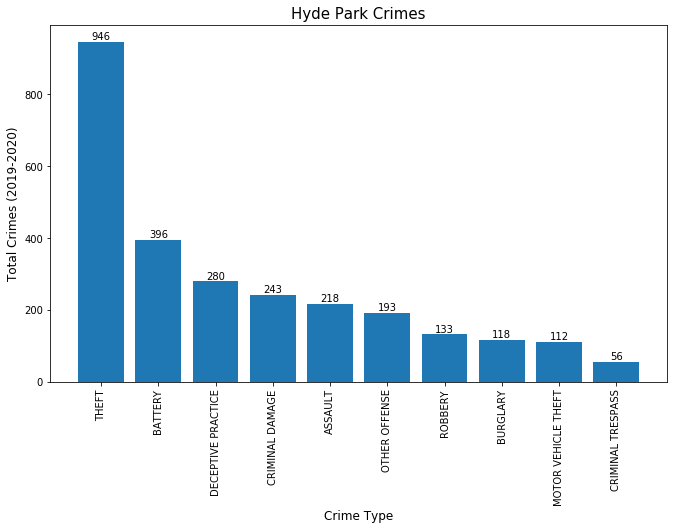

In [7]:
# creates bar graph labels
# Source: https://stackoverflow.com/questions/40287847/python-matplotlib-bar-chart-adding-bar-titles

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
fig, ax = plt.subplots(figsize=(10,8))
neighborhood = 'HYDE PARK'

df = count_by_community[count_by_community['COMMUNITY']==neighborhood]
df = df.sort_values('COUNT', ascending=False).head(10)
bars = ax.bar('Primary Type', 'COUNT', data=df)
ax.set_title('{} Crimes'.format(neighborhood.title()), fontsize=15)
ax.set_ylabel('Total Crimes (2019-2020)', fontsize=12);
ax.set_xlabel('Crime Type', fontsize=12);
ax.set_xticklabels(df['Primary Type'], rotation=90)
fig.tight_layout(pad=3.0)

# sets labels
autolabel(bars)

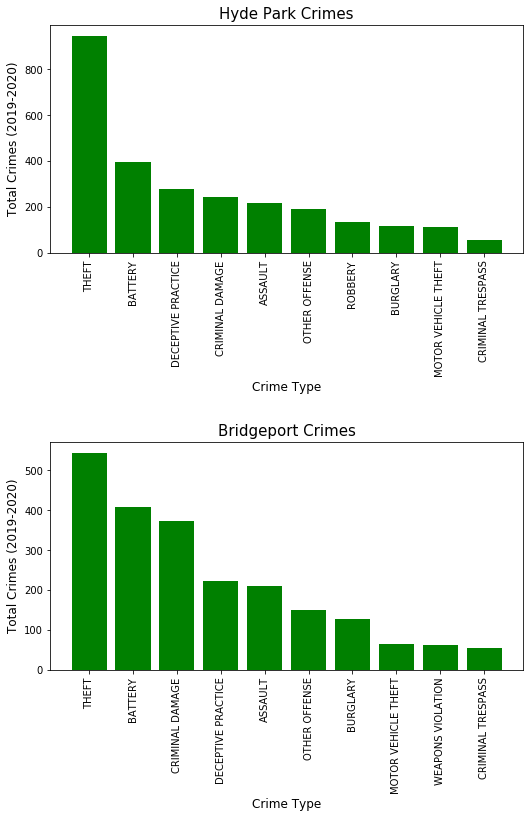

<Figure size 432x288 with 0 Axes>

In [8]:
# creating two subplots using a loop

fig, axes = plt.subplots(2, figsize=(8,12))
neighborhoods = ['HYDE PARK', 'BRIDGEPORT']

for i, neighborhood in enumerate(neighborhoods):
    df = count_by_community[count_by_community['COMMUNITY']==neighborhood]
    df = df.sort_values('COUNT', ascending=False).head(10)
    bars = axes[i].bar('Primary Type', 'COUNT', data=df, color='green')
    axes[i].set_title('{} Crimes'.format(neighborhood.title()), fontsize=15)
    axes[i].set_ylabel('Total Crimes (2019-2020)', fontsize=12);
    axes[i].set_xlabel('Crime Type', fontsize=12);
    axes[i].set_xticklabels(df['Primary Type'], rotation=90)
    fig.tight_layout(pad=3.0)
#     autolabel(bars)

plt.show()
plt.savefig('hyde_park_crimes.png')

## Plotting crimes across years

In [9]:
by_year = merged.groupby(['Primary Type', 'Year']).size().to_frame('COUNT').reset_index()
by_year['Year'] = by_year['Year'].astype(str)
by_year.head()

,Primary Type,Year,COUNT
0,ARSON,2019,375
1,ARSON,2020,460
2,ASSAULT,2019,20613
3,ASSAULT,2020,15040
4,BATTERY,2019,49494


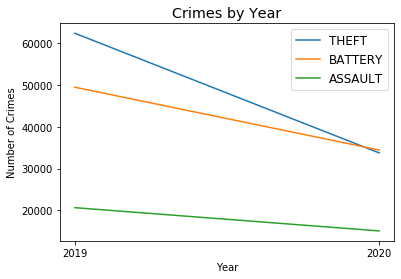

In [10]:
fig, ax = plt.subplots()

plt.rcParams.update({'font.size': 12}) # or you could update all the font sizes at once

crime_list = ['THEFT', 'BATTERY', 'ASSAULT']
for crime in crime_list:
    ax.plot('Year', 'COUNT', data=by_year[by_year['Primary Type']==crime], label=crime)

ax.set_title('Crimes by Year')
ax.set_ylabel('Number of Crimes');
ax.set_xlabel('Year')
ax.legend()

# Bokeh Example
https://realpython.com/python-data-visualization-bokeh/#from-data-to-visualization

In [41]:
import numpy as np

# Bokeh libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook() #

plot = figure(title='Bridgeport Crimes', # set up Figure object
              x_axis_label='Crime', 
              y_axis_label='Count',
              x_range=df['Primary Type'],
              y_range=(0,600),
              plot_width=800, 
              plot_height=600)

plot.vbar(x=df['Primary Type'], top=df['COUNT'],width=0.9)
plot.xaxis.major_label_orientation = "vertical"

plot.y_range.start = 0

show(plot)

Loading BokehJS ...

In [32]:
df

,COMMUNITY,Primary Type,COUNT
286,BRIDGEPORT,THEFT,544
263,BRIDGEPORT,BATTERY,408
267,BRIDGEPORT,CRIMINAL DAMAGE,374
270,BRIDGEPORT,DECEPTIVE PRACTICE,223
262,BRIDGEPORT,ASSAULT,211
280,BRIDGEPORT,OTHER OFFENSE,150
264,BRIDGEPORT,BURGLARY,128
276,BRIDGEPORT,MOTOR VEHICLE THEFT,66
287,BRIDGEPORT,WEAPONS VIOLATION,63
269,BRIDGEPORT,CRIMINAL TRESPASS,55
